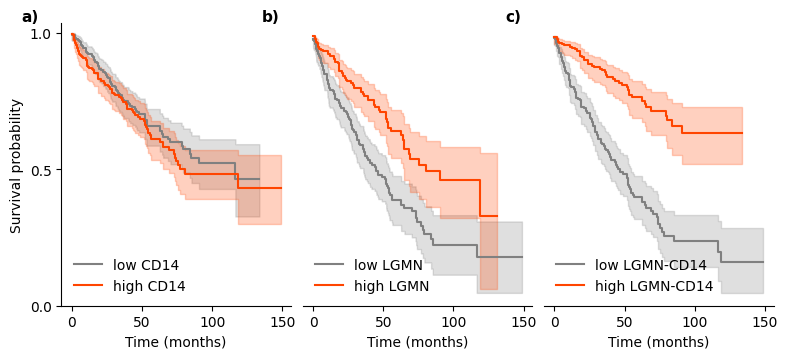

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from lifelines import KaplanMeierFitter


df = pd.read_csv('../cluster_compute/data/TCGA-KIRC.csv', sep=',')
df['time'] = df['time'] / 30.5

gene_a = 'LGMN'
gene_b = 'CD14'

interaction = f'{gene_a}-{gene_b}'


median_gene_a = df[gene_a].median()
gene_a_low = df[gene_a] <= median_gene_a
gene_a_high = df[gene_a] > median_gene_a


median_gene_b = df[gene_b].median()
gene_b_low = df[gene_b] <= median_gene_b
gene_b_high = df[gene_b] > median_gene_b


df_genes = df[[gene_a, gene_b]].copy()
df_genes[interaction] = df_genes[gene_a] - df_genes[gene_b]

median_interaction = df_genes[interaction].median()
interaction_low = df_genes[interaction] <= median_interaction
interaction_high = df_genes[interaction] > median_interaction


fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8, 3.7))

kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][gene_a_low], df['event'][gene_a_low], label=f'low {gene_a}')
kmf_low.plot_survival_function(ax=ax[1], color="gray")

kmf_high = kmf.fit(df['time'][gene_a_high], df['event'][gene_a_high], label=f'high {gene_a}')
kmf_high.plot_survival_function(ax=ax[1], color="orangered")
ax[0].text(-0.1, 1.05, 'a)', transform=ax[0].transAxes, fontsize=11, fontweight='bold',va='top', ha='right')

kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][gene_b_low], df['event'][gene_b_low], label=f'low {gene_b}')
kmf_low.plot_survival_function(ax=ax[0], color="gray")

kmf_high = kmf.fit(df['time'][gene_b_high], df['event'][gene_b_high], label=f'high {gene_b}')
kmf_high.plot_survival_function(ax=ax[0],color="orangered")
ax[1].text(-0.1, 1.05, 'b)', transform=ax[1].transAxes, fontsize=11, fontweight='bold', va='top', ha='right')


kmf = KaplanMeierFitter()
kmf_low = kmf.fit(df['time'][interaction_low], df['event'][interaction_low], label=f'low {interaction}')
kmf_low.plot_survival_function(ax=ax[2], color="gray")

kmf_high = kmf.fit(df['time'][interaction_high], df['event'][interaction_high], label=f'high {interaction}')
kmf_high.plot_survival_function(ax=ax[2], color="orangered")
ax[2].text(-0.1, 1.05, 'c)', transform=ax[2].transAxes, fontsize=11, fontweight='bold', va='top', ha='right')


ax[0].set_yticks([0, 0.5, 1])
ax[1].set_yticks([])
ax[1].set_yticklabels([])
ax[2].set_yticks([])
ax[2].set_yticklabels([])

ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)


ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)

ax[0].legend(loc='lower left', frameon=False)
ax[1].legend(loc='lower left', frameon=False)
ax[2].legend(loc='lower left', frameon=False)

ax[0].set_ylabel("Survival probability")
ax[0].set_xlabel("Time (months)")
ax[1].set_xlabel("Time (months)")
ax[2].set_xlabel("Time (months)")

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) 

plt.savefig('figure1_biomarker_example.pdf', dpi=300)